In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.display.float_format = '{:.2f}'.format

# New Section

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df=pd.read_csv("/content/drive/My Drive/insaid/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [44]:
df.shape

(6362620, 11)

In [45]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [46]:
print(df["isFraud"].unique())
print(df["isFlaggedFraud"].unique())
print(df["step"].unique())

[0 1]
[0 1]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [47]:
df['isFraud'] = df['isFraud'].astype('bool')
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('bool')
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud              bool
isFlaggedFraud       bool
dtype: object

In [48]:
print(df["type"].unique())
print("No of Distinct Values in nameOrig :",df["nameOrig"].nunique())
print("No of distinct Values in nameDest :",df["nameDest"].nunique())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
No of Distinct Values in nameOrig : 6353307
No of distinct Values in nameDest : 2722362


In [49]:
df.info(memory_usage='deep')
# "amount","oldbalanceDest","newbalanceDest","oldbalanceOrg","newbalanceOrig"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         bool   
 10  isFlaggedFraud  bool   
dtypes: bool(2), float64(5), int64(1), object(3)
memory usage: 1.5 GB


In [50]:
print("Min and Max for step column:")
print("Min:",df["step"].min())
print("Max:",df["step"].max())

Min and Max for step column:
Min: 1
Max: 743


In [51]:
df["step"].memory_usage(index=False,deep=True)

50900960

In [52]:
df["step"]=df["step"].astype("int16")
df["step"].memory_usage(index=False,deep=True)

12725240

In [53]:
print("Min and Max for step column:")
print("Min:",df["step"].min())
print("Max:",df["step"].max())

Min and Max for step column:
Min: 1
Max: 743


In [54]:
df[["amount","oldbalanceDest","newbalanceDest","oldbalanceOrg","newbalanceOrig"]].describe()

,amount,oldbalanceDest,newbalanceDest,oldbalanceOrg,newbalanceOrig
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,179861.90,1100701.67,1224996.40,833883.10,855113.67
std,603858.23,3399180.11,3674128.94,2888242.67,2924048.50
min,0.00,0.00,0.00,0.00,0.00
25%,13389.57,0.00,0.00,0.00,0.00
50%,74871.94,132705.66,214661.44,14208.00,0.00
75%,208721.48,943036.71,1111909.25,107315.18,144258.41
max,92445516.64,356015889.35,356179278.92,59585040.37,49585040.37


In [55]:
df[["amount","oldbalanceDest","newbalanceDest","oldbalanceOrg","newbalanceOrig"]].memory_usage(index=False,deep=True)

amount            50900960
oldbalanceDest    50900960
newbalanceDest    50900960
oldbalanceOrg     50900960
newbalanceOrig    50900960
dtype: int64

In [56]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [57]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94
min,1.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92


In [58]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [59]:
df["type"].nunique()

5

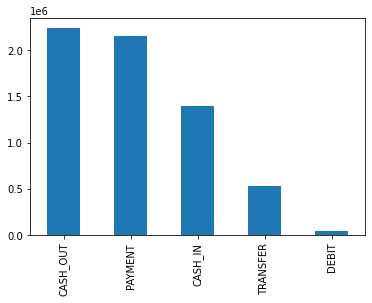

In [60]:
df['type'].value_counts().plot(kind='bar')

In [61]:
corr=pd.DataFrame(abs(df.corr()['isFraud']))
print(corr)

                isFraud
step               0.03
amount             0.08
oldbalanceOrg      0.01
newbalanceOrig     0.01
oldbalanceDest     0.01
newbalanceDest     0.00
isFraud            1.00
isFlaggedFraud     0.04


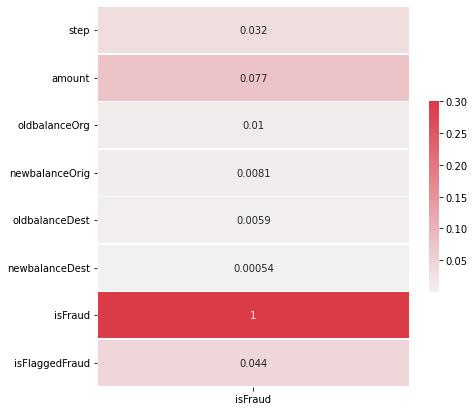

In [62]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square= False, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

In [63]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [64]:
outliers = find_outliers_IQR(df[["amount","oldbalanceDest","newbalanceDest","oldbalanceOrg","newbalanceOrig","step"]])
print("Total Outlier=",str(len(outliers)))

Total Outlier= 6362620


IQR method gives a very huge outlier value. Considering the fact that this is a fraud detection problem, it would benefit us to use more precise outlier values using clustering

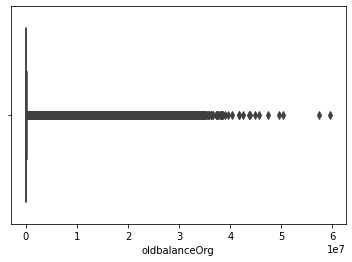

In [65]:
import warnings
#Visually observing the outliers by plotting boxplot.
warnings.filterwarnings('ignore')
sns.boxplot(df['oldbalanceOrg'])
plt.show()

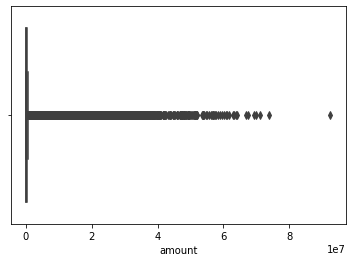

In [66]:
#Visually observing the outliers by plotting boxplot.
warnings.filterwarnings('ignore')
sns.boxplot(df['amount'])
plt.show()

In [67]:
#defining a function that caps the outliers.
def capping_outliers(col):
    upper_limit = df[col].mean() + 3*df[col].std()
    lower_limit = df[col].mean() - 3*df[col].std()
    df[col] = np.where(df[col] > upper_limit, 
      upper_limit,
    np.where(
      df[col] < lower_limit,
      lower_limit,
    df[col]
            )
                    )


In [68]:
#Capping the outliers for all the columns with continuous variable.
capping_outliers('amount')
capping_outliers('oldbalanceOrg')
capping_outliers('newbalanceOrig')
capping_outliers('oldbalanceDest')

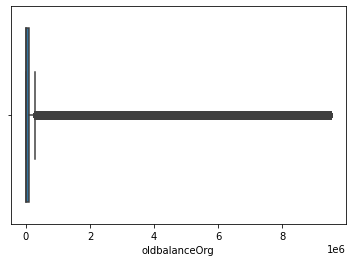

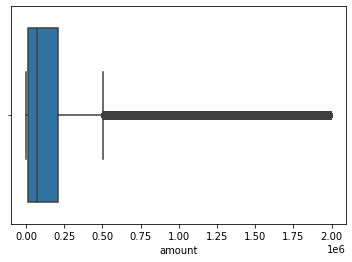

In [31]:
#Visually observing the after treating outliers by plotting boxplot.
warnings.filterwarnings('ignore')
sns.boxplot(df['oldbalanceOrg'])
plt.show()
#Visually observing the after treating outliers by plotting boxplot.
warnings.filterwarnings('ignore')
sns.boxplot(df['amount'])
plt.show()

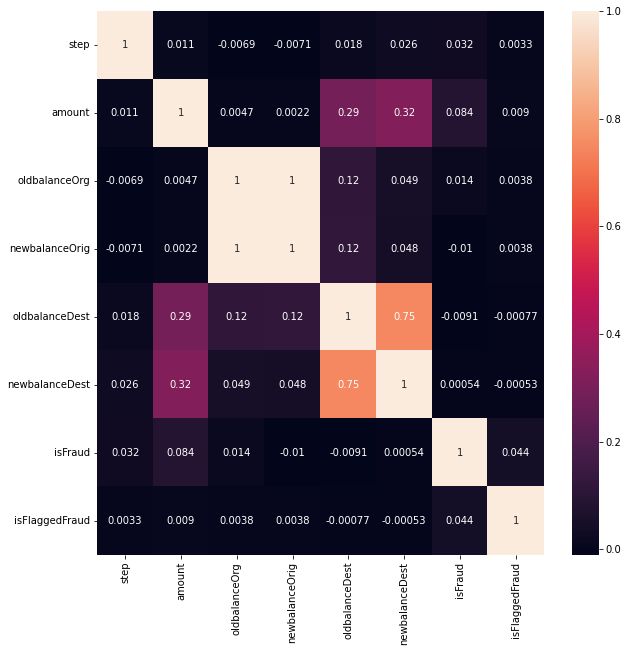

In [69]:
corr=df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.select_dtypes(include = ["object","boolean"]).columns:
    df[i] = le.fit_transform(df[i].astype(str))

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(df)

,variables,VIF
0,step,2.86
1,type,5.34
2,amount,1.91
3,nameOrig,2.86
4,oldbalanceOrg,325.34
5,newbalanceOrig,330.17
6,nameDest,3.96
7,oldbalanceDest,2.92
8,newbalanceDest,2.63
9,isFraud,1.18


In [84]:
df['Orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df['Path'] = df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(df)

,variables,VIF
0,type,2.80
1,amount,1.37
2,isFraud,1.17
3,isFlaggedFraud,1.00
4,Orig,1.29
5,Dest,1.07
6,Path,2.67


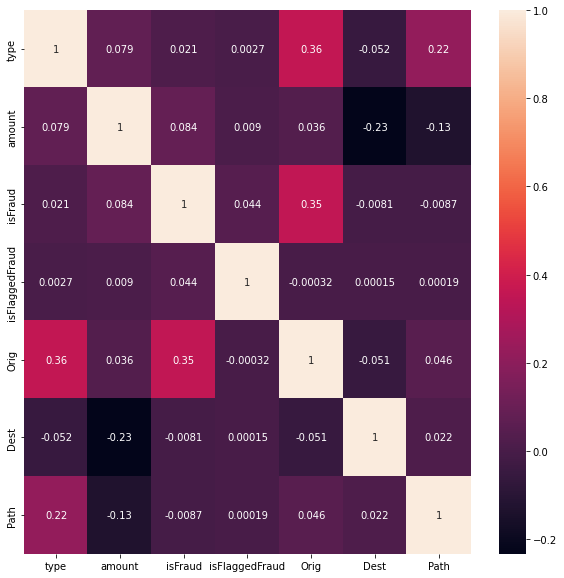

In [85]:
corr=df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [93]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [104]:
df.head()

,type,amount,isFraud,isFlaggedFraud,Orig,Dest,Path
0,3,9839.64,0,0,9839.64,0.00,2419963.00
1,3,1864.28,0,0,1864.28,0.00,3922922.00
2,4,181.00,1,0,181.00,0.00,1441841.00
3,1,181.00,1,0,181.00,21182.00,6219958.00
4,3,11668.14,0,0,11668.14,0.00,4274900.00


In [102]:
Y = df["isFraud"]
X = df.drop(["isFraud"], axis= 1)

In [103]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
sel.fit(X_train, Y_train)
sel.get_support()

array([False, False, False,  True,  True, False])

In [105]:
X_train

,type,amount,isFlaggedFraud,Orig,Dest,Path
2408104,0,26771.98,0,-26771.98,26771.98,2506351.00
662430,1,344879.65,0,0.00,-344879.65,2034634.00
496595,4,1862607.84,0,0.00,-1583803.26,4719184.00
5053741,3,37739.35,0,37739.35,0.00,5807976.00
755621,1,376055.13,0,22501.00,-376055.12,2364828.00
...,...,...,...,...,...,...
1570006,0,129715.85,0,-129715.85,129715.85,2563403.00
2234489,3,2459.70,0,0.00,0.00,4300231.00
4926484,1,10579.16,0,10579.16,-10579.16,1938844.00
4304572,1,73020.76,0,20289.00,-73020.77,4596477.00


In [107]:
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['Orig', 'Dest'], dtype='object')


In [109]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [110]:
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.95887438403257
